1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import scipy.integrate as integr
import math

%matplotlib inline

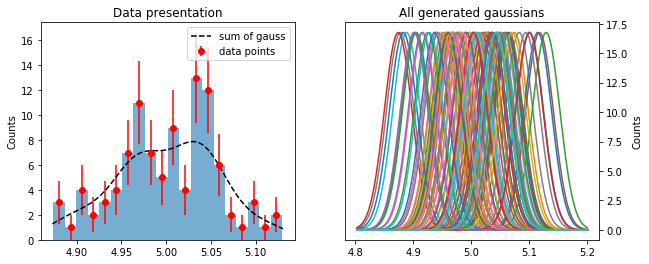

In [2]:
#creation of x
N = 100 #len of np array, O(100)
mean, sigma = 5.00, 0.05
x = np.random.normal(mean, sigma, N)

#creation of the histogram
nbins = 20 #edit accordingly to the graph
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
n, bins, patches = ax1.hist(x, nbins, range=(x.min(),x.max()), histtype='bar', color=None, alpha = 0.6)  #can replace bar with step
#Setting a proper label
ax1.set_ylabel('Counts')
#Displaying only integer ticks
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#Displaying as points with errors
bincenters = 0.5*(bins[1:]+bins[:-1])
err = np.sqrt(n)
ax1.errorbar(bincenters, n, yerr=err, fmt='or', ecolor='r', label='data points')

#gaussians
grid = 120 #number of samples to take from gaussian distribution
std_tune = 1.06*x.std()*x.size**(-0.2)
x1 = np.linspace(x.min() - 3*std_tune, x.max() +3*std_tune, grid) #range of gaussians
ngauss = np.zeros((N,grid))
ax2.set_ylabel('Counts')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
i=0
for p in x:
    ngauss [i,:] = stats.norm.pdf(x1, p, std_tune)
    i+=1
    ax2.plot(x1, stats.norm.pdf(x1, p, std_tune))

#sum and normalize
gauss_sum = np.sum(ngauss, axis=0)
integral0 = integr.trapz(n, bincenters)
integral1 = integr.trapz(gauss_sum, x1)
normalization = integral0/integral1
gauss_sum = gauss_sum * normalization
delta = int(np.trunc(3*std_tune/(x.max() - x.min() + 6*std_tune)*grid))
ax1.plot(x1[delta:(len(x1)-delta)], gauss_sum[delta:(len(gauss_sum)-delta)], '--', color='black', label='sum of gauss')
ax1.legend(loc='best')
ax1.set_title('Data presentation')
ax2.set_title('All generated gaussians')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-29 18:59:14--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-11-29 18:59:14--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5177f581d84a1c5a8c24087da9.dl.dropboxusercontent.com/cd/0/inline/BEJUZY8Ho9gRPbfrBLxxdzyeiM963xXPZnXVyGA63FyMbb1r7IbUbY57fF_El-K4UY9PZ7J4l1thWVJdV7gcUuWOFWiv2t_pzhzH8JuvV7GVoA/file# [following]
--2020-11-29 18:59:15--  https://uc5177f581d84a1c5a8c24087da9.dl.dropboxusercontent.com/cd/0/inline/BEJUZY8Ho9gRPbfrBLxxdzyeiM963xXPZnXVyGA63FyMbb1r7IbUbY57fF_El-K4UY9PZ7J4l1t

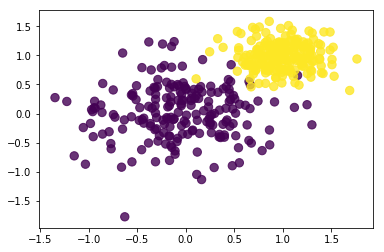

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

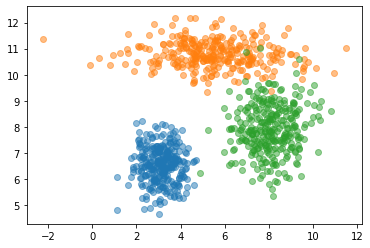

In [4]:
def scatter_plot(N, mx, my, stdx, stdy, nsamples):
    #collect data in a fancy way
    data = np.zeros((N,4))
    for i in range(0,N,1):
        data [i,:] = [mx[i], stdx[i], my[i], stdy[i]]
    #generating the datasets
    xes = np.zeros((N,nsamples))
    yes = np.zeros((N,nsamples))
    for i in range(0, N, 1):
        xes[i,:] = np.random.normal(data[i,0], data[i,1], nsamples)
        yes[i,:] = np.random.normal(data[i,2], data[i,3], nsamples)
    #producing the scatter plot
    fig, canvas = plt.subplots()
    for i in range(0, N, 1):
        canvas.scatter(xes[i, :], yes[i,:], alpha=0.5)

#initialization: means and std
N = 3 #number of data sets
mx = [3.1, 5.5, 8.0] #list of means of all datasets along x axis
my = [6.5, 10.8, 8.0]
stdx = [0.7, 1.9, 1.0]
stdy = [0.7, 0.5,1.0]
nsamples = 300 #number of samples to draw for each dataset

#generate the plot
scatter_plot(N, mx, my, stdx, stdy, nsamples)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-11-29 18:59:16--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-11-29 18:59:17--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa9bd6a5a92e465047795d6177.dl.dropboxusercontent.com/cd/0/inline/BEI_LViguarSJkWL41uHnXiB2-k2ELkXEfL9vI_52u6jGB5PluSMbJTtyvTKPbpkN9gs5JchYr_eZWq3QY8rTvs3OrmDXdaNEYpaQjl8o__8BQ/file# [following]
--2020-11-29 18:59:17--  https://ucaa9bd6a5a92e465047795d6177.dl.dropboxusercontent.com/cd/0/inline/BEI_LViguarSJkWL41uHnXiB2-k2ELkXEfL9vI_52u6jGB5PluSMbJTtyvTKPbpkN9gs5JchYr_eZWq3QY8rTvs3OrmDXdaNEYpaQjl8o__8BQ/file
R

In [6]:
#loading the data
rdata = np.load('residuals_261.npy', allow_pickle = True)
df_res = pd.DataFrame(rdata.item())
#exploring the data
df_res

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


<ErrorbarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

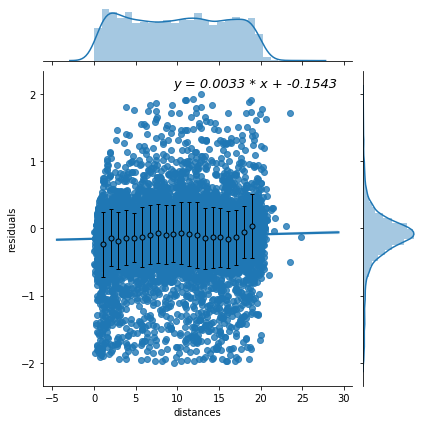

In [7]:
import seaborn as sns

#selecting entries with residuals in absolute value smaller than 2
df_res = df_res[df_res['residuals'].abs() < 2.0]

#linear regression of residuals versus distances
slope, intercept, r_value, p_value, std_err = stats.linregress(df_res['distances'],df_res['residuals'])

#plot using seaborn
plt.figure()
g = sns.jointplot(data=df_res, x='distances', y='residuals', kind='reg')
string_reg = "y = %.4f * x + %.4f" % (slope, intercept)
#display results of regression
results_canvas = plt.text(9.5,2.1, string_reg, fontsize = 13, color='Black', fontstyle='italic')

nbins = 20
step = 21.0/nbins
#x is the array of equispaced centers of nbins
x = np.linspace(step, 20.0-step, num=nbins, endpoint=True)
y = np.zeros([nbins])
erry = np.zeros([nbins])
#y is filled with means of 'residuals' for every bin, erry with the dtandars deviation
for i in range(1, nbins+1, 1):
    filtered = df_res[(df_res['distances'] <= step*i) & (df_res['distances'] > step*(i-1))]
    y[i-1] = filtered['residuals'].mean()
    erry[i-1] = filtered['residuals'].std()

#Plot the profile plot on top of the scatter plot
#concatenated = pd.concat([df_res.assign(dataset='set1'), set2.assign(dataset='set2')])
plt.errorbar(x, y, erry ,marker='.', mec='black', zorder=10, elinewidth=1, capsize=2, ecolor='black',linestyle="None", markersize=10)